In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from utils.score import ScoreRegression

In [2]:
train = store_sales = pd.read_csv("datasets/features/train.csv", parse_dates=["date"])
store_sales["date"] = train.date.dt.to_period("D")
store_sales = store_sales.set_index(["store_nbr", "family", "date"]).sort_index()

y = store_sales.unstack(["store_nbr", "family"])

fourier = CalendarFourier(freq="M", order=2)
dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=2,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
X = dp.in_sample()

In [3]:
X.head()

,const,trend,trend_squared,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)"
date,,,,,,,,,,,,,
2013-01-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000
2013-01-02,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201299,0.979530,0.394356,0.918958
2013-01-03,1.0,3.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.394356,0.918958,0.724793,0.688967
2013-01-04,1.0,4.0,16.0,0.0,0.0,1.0,0.0,0.0,0.0,0.571268,0.820763,0.937752,0.347305
2013-01-05,1.0,5.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.724793,0.688967,0.998717,-0.050649


In [4]:
y.head()

city                                      ... sales                 \
store_nbr    1                                       ...    54                  
family       0   1   2   3   4   5   6   7   8   9   ...    23      24     25   
date                                                 ...                        
2013-01-01   18  18  18  18  18  18  18  18  18  18  ...   0.0   0.000    0.0   
2013-01-02   18  18  18  18  18  18  18  18  18  18  ...   0.0  73.771  228.0   
2013-01-03   18  18  18  18  18  18  18  18  18  18  ...   0.0  50.257  156.0   
2013-01-04   18  18  18  18  18  18  18  18  18  18  ...   0.0  40.223  146.0   
2013-01-05   18  18  18  18  18  18  18  18  18  18  ...   0.0  43.431  205.0   

                                                   
store_nbr                                          
family       26   27      28    29   30   31   32  
date                                               
2013-01-01  0.0  0.0   0.000   0.0  0.0  0.0  0.0  
2013-01-02  0.0  0.0  15.514  61.0  0.0  0.0  3.0  
2013-01-03  0.0  0.0   4.313   1.0  0.0  0.0  2.0  
2013-01-04  0.0  0.0  26.743  38.0  0.0  0.0  2.0  
2013-01-05  0.0  0.0  31.118  32.0  0.0  0.0  1.0  

[5 rows x 16038 columns]

In [5]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [6]:
test = pd.read_csv("datasets/features/test.csv", parse_dates=["date"])
test = test[test["date"] < "2017-01-16"]
test.head()

,date,store_nbr,city,state,type,cluster,family,onpromotion,dcoilwtico,day_week,holiday_or_weekday,sales
0,2017-01-01,1,18,12,3,13,0,0,53.75,6,2,0.0
1,2017-01-01,1,18,12,3,13,1,0,53.75,6,2,0.0
2,2017-01-01,1,18,12,3,13,2,0,53.75,6,2,0.0
3,2017-01-01,1,18,12,3,13,3,0,53.75,6,2,0.0
4,2017-01-01,1,18,12,3,13,4,0,53.75,6,2,0.0


In [7]:
test["date"] = test.date.dt.to_period("D")
test = test.set_index(["store_nbr", "family", "date"]).sort_index()
y_test = test.unstack(["store_nbr", "family"])

In [8]:
len(test.loc[1, 0, :])

15

In [9]:
# Create features for test set
X_test = dp.out_of_sample(steps=15)
X_test.index.name = 'date'
X_test.head()

,const,trend,trend_squared,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)"
date,,,,,,,,,,,,,
2017-01-01,1.0,1458.0,2125764.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000
2017-01-02,1.0,1459.0,2128681.0,0.0,1.0,0.0,0.0,0.0,0.0,0.201299,0.979530,0.394356,0.918958
2017-01-03,1.0,1460.0,2131600.0,0.0,0.0,1.0,0.0,0.0,0.0,0.394356,0.918958,0.724793,0.688967
2017-01-04,1.0,1461.0,2134521.0,0.0,0.0,0.0,1.0,0.0,0.0,0.571268,0.820763,0.937752,0.347305
2017-01-05,1.0,1462.0,2137444.0,0.0,0.0,0.0,0.0,1.0,0.0,0.724793,0.688967,0.998717,-0.050649


In [10]:
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

In [17]:
y_test.head()

city                                      ... sales             \
store_nbr    1                                       ...    54              
family       0   1   2   3   4   5   6   7   8   9   ...    23         24   
date                                                 ...                    
2017-01-01   18  18  18  18  18  18  18  18  18  18  ...   0.0   0.000000   
2017-01-02   18  18  18  18  18  18  18  18  18  18  ...   1.0  57.447998   
2017-01-03   18  18  18  18  18  18  18  18  18  18  ...   0.0  57.052000   
2017-01-04   18  18  18  18  18  18  18  18  18  18  ...   0.0  64.540000   
2017-01-05   18  18  18  18  18  18  18  18  18  18  ...   0.0  57.417000   

                                                               
store_nbr                                                      
family         25   26   27      28     29       30   31   32  
date                                                           
2017-01-01    0.0  0.0  0.0   0.000    0.0    0.000  0.0  0.0  
2017-01-02  315.0  1.0  8.0  78.719  126.0  475.658  0.0  8.0  
2017-01-03  291.0  0.0  6.0  72.347   53.0  936.004  0.0  1.0  
2017-01-04  228.0  0.0  5.0  43.715   98.0  754.560  0.0  2.0  
2017-01-05  227.0  2.0  5.0  75.235   17.0  370.752  0.0  0.0  

[5 rows x 16038 columns]

In [20]:
y_test.loc(axis=1)['sales'].sum(axis=1).head()

date
2017-01-01    1.208250e+04
2017-01-02    1.402306e+06
2017-01-03    1.104377e+06
2017-01-04    9.900935e+05
2017-01-05    7.776210e+05
Freq: D, dtype: float64

In [13]:
y_pred_score = y_pred.unstack()["sales"].groupby("date").sum()
y_test_score = y_test.unstack()["sales"].groupby("date").sum()

In [14]:
scores = ScoreRegression()
scores.calculate(y_test_score, y_pred_score)
print(scores)

ScoreRegression(r2=0.002406185316919829, mse=97632618897.79573, mae=226469.78474957022, rmsle=1.131910731236773)


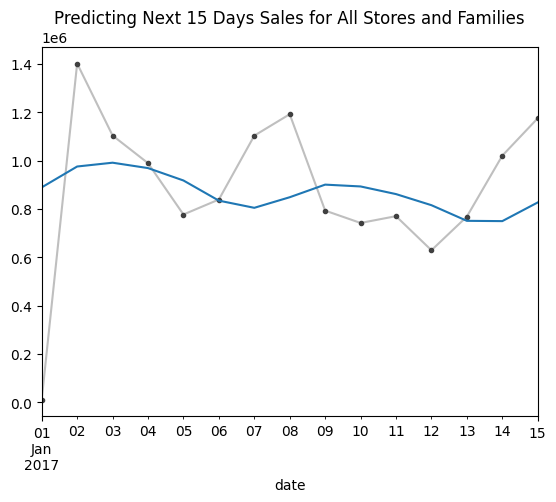

In [23]:
ax = y_test_score.plot(**plot_params)
ax = y_pred_score.plot(ax=ax)
ax.set_title(f'Predicting Next 15 Days Sales for All Stores and Families');

In [15]:
# ScoreRegression(
#     r2=0.002406185316919829,
#     mse=97632618897.79573,
#     mae=226469.78474957022,
#     rmsle=1.131910731236773,
# )